# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
os.getcwd()

'C:\\Users\\Chithsabesh'

In [3]:
# Your work here.
human_body = pd.read_csv('C:/Users/Chithsabesh/Downloads/Springboard Course/human_body_temperature.csv')

In [4]:
human_body.head(5)

temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0

C:\Users\Chithsabesh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


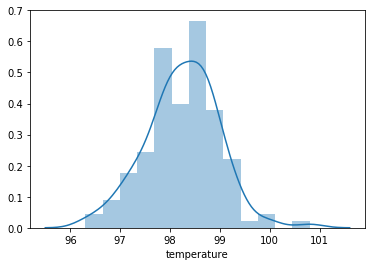

In [5]:
sns.distplot(human_body['temperature'])

# Very clear from the plot it is normally distributed


IK : The plot isnt truly normal, is it ?  Can you try  Q-Q plot  ?

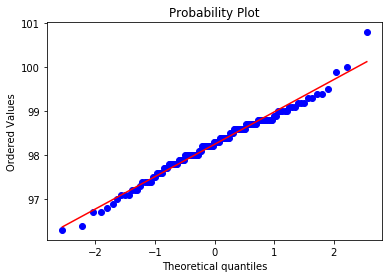

In [7]:
from scipy import stats
fig = plt.figure()
res = stats.probplot(human_body['temperature'], plot=plt)
plt.show()
#Yes there is a very slight positive skew here

In [8]:
# conduct normal test
from scipy.stats import normaltest
p_value = normaltest(human_body['temperature'])


print('p value =',p_value)

p value = NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)


# Null-Hypothesis - Data is normally distributed
# Alternate-Hypothesis-Data is not normally distributed
# A small p (â‰¤ 0.05), reject the null hypothesis. This is strong evidence that the null hypothesis is invalid.
# A large p (> 0.05) means the alternate hypothesis is weak, so you do not reject the null.
# Therefore Normally distributed

In [ ]:
IK : p > 0.05 , so you fail to reject the null hypothesis, hence the distribution is likely normal.
    

# 2) Is the sample size large? Are the observations independent?

In [6]:
human_body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


Since more then 30 it is large sample size and there are no Unique features in the dataset which shows independence

IK : what do you mean by no unique features ? 

In [8]:
#On second thought there is nothing here to show that it is independent like say a unique ID. If there are like 2 common unique Ids we can
#tell that the same person has been measured twice

# QUESTION #3: Is the true population mean really 98.6 degrees F?

 # Bootstrap Hypothesis 

In [9]:
#consider given dataset as one-sample
temp = human_body['temperature']

In [10]:
temp.dtype

dtype('float64')

In [11]:
temp = temp.as_matrix()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [12]:
temp

array([ 99.3,  98.4,  97.8,  99.2,  98. ,  99.2,  98. ,  98.8,  98.4,
        98.6,  98.8,  96.7,  98.2,  98.7,  97.8,  98.8,  98.3,  98.2,
        97.2,  99.4,  98.3,  98.2,  98.6,  98.4,  97.8,  98. ,  97.8,
        98.2,  98.4,  98.1,  98.3,  97.6,  98.5,  98.6,  99.3,  99.5,
        99.1,  98.3,  97.9,  96.4,  98.4,  98.4,  96.9,  97.2,  99. ,
        97.9,  97.4,  97.4,  97.9,  97.1,  98.9,  98.3,  98.5,  98.6,
        98.2,  98.6,  98.8,  98.2,  98.2,  97.6,  99.1,  98.4,  98.2,
        98.6,  98.7,  97.4,  97.4,  98.6,  98.7,  98.9,  98.1,  97.7,
        98. ,  98.8,  99. ,  98.8,  98. ,  98.4,  97.4,  97.6,  98.8,
        98. ,  97.5,  99.2,  98.6,  97.1,  98.6,  98. ,  98.7,  98.1,
        97.8, 100. ,  98.8,  97.1,  97.8,  96.8,  99.9,  98.7,  98.8,
        98. ,  99. ,  98.5,  98. ,  99.4,  97.6,  96.7,  97. ,  98.6,
        98.7,  97.3,  98.8,  98. ,  98.2,  99.1,  99. ,  98. , 100.8,
        97.8,  98.7,  98.4,  97.7,  97.9,  99. ,  97.2,  97.5,  96.3,
        97.7,  98.2,

In [13]:
np.mean(temp)

98.24923076923075

# Null Hypothesis: The true mean in this sample is equal to 98.6

In [15]:
len(temp)

130

In [19]:
# Shift the sample data such that its mean is 98.6
mean = 98.6
sample_shifted = temp-np.mean(temp) + mean
#Take bootstrap repliates of temp shifted
def diff_from_sample(data,mean=98.6):
    return np.mean(data)-mean
diff_obs = diff_from_sample(temp)
diff_obs


-0.35076923076924515

In [20]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [21]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


In [23]:
# compare against 98.6 as you are already given the value , not the sample
# p-value < 0.05 
bs_replicates = draw_bs_reps(temp,diff_from_sample,10000)
## IK : changed the following line
p_value = np.sum(bs_replicates  >= 98.6)/10000
p_value

0.0

P-value greater then 0.05 accept null hypothesis mean = 98.6

One Sample or Two sample test- We would use one sample test since we are comparing one particular sample with a population mean of 98.6

In this situation it is better to use T-test since population standard deviation is not known

IK : but you do know the sample std deviation and n > 30

In [9]:
#In this particular task we can test with Both z and T-test and it guess it changes from person to person
# Here there is no Population Standard Deviation which is required to perform a Z-test
#But then Sample size is 130 implying large sample so then we cannot perform a T-test

# H0: mean = 98.6
# Ha: mean != 98.6

In [8]:
# Do one sample t-test for proving
from scipy.stats import ttest_1samp
t_statistic, p_value = ttest_1samp(human_body['temperature'], 98.6)

print('t-statistic:',t_statistic)
print('p value =',p_value)

t-statistic: -5.4548232923645195
p value = 2.4106320415561276e-07


# Since p-value is lesser then alpha value we reject null hypothesis so hence the population mean seems different then 98.6

In [9]:
#Trying with z-test
from statsmodels.stats.weightstats import ztest
z_statistic, p_value = ztest(x1= human_body['temperature'], value = 98.6)

print('z-statistic:',z_statistic)
print('p value =',p_value)

z-statistic: -5.4548232923645195
p value = 4.9021570141012155e-08


# Result seems the same

# QUESTION4: Repeat both z-test & t-test for a sample of size 10 from the data. Which is the correct one to use?

In [137]:
# generate random sample
sample = np.random.choice(human_body['temperature'], size=10)

In [138]:
# conduct one-sample t-test
t_statistic, p_value = ttest_1samp(sample, 98.6)

print('t-statistic:',t_statistic)
print('p value =',p_value)

t-statistic: -0.48976272702292534
p value = 0.6360180768545363


In [139]:
z_statistic, p_value = ztest(x1= sample, value = 98.6)

print('z-statistic:',z_statistic)
print('p value =',p_value)

z-statistic: -0.48976272702292534
p value = 0.6243018088228873


# Best to use t-test since in general it is better for a small sample size and population standard deviation is also not known and small sample size means there is a chance they may not be normally distributed and Z-test has an assumption that the data should be normally distributed

# 5) At what temperature should we consider someone's temperature to be "abnormal"?

In [43]:
def bootstrap_replicate_1d(data, func):
    bs_sample = (np.random.choice(data, size=len(data)))
    return func(bs_sample)

In [44]:
bs_replicates = np.empty(10000)
for i in range(10000):
        bs_replicates[i] = bootstrap_replicate_1d(temp, np.mean)

In [26]:
bs_replicates

array([98.15769231, 98.25923077, 98.19692308, ..., 98.17615385,
       98.35384615, 98.26538462])

In [49]:
conf_int = np.percentile(bs_replicates,[0.05, 95.00])
conf_int

array([98.04846154, 98.35461538])

# Above is abnormal temperature by bootstrap approach

In [33]:
# calculate 95% confidence interval

## IK : please check the usage of stats.norm.interval

from scipy import stats
## IK : changed this line :
conf_int = stats.norm.interval(0.95, loc=np.mean(human_body['temperature']), scale=np.std(human_body['temperature'])/np.sqrt(len(human_body['temperature'])))

print('95% confidence interval:',conf_int)

95% confidence interval: (98.12368211145665, 98.37477942700491)


# Abnormal temperature here is below 96.8 and above 99.68

# 6) Is there a significant difference between males and females in normal temperature?

# Use two sample unpaired t tests since we are not measuring same entities twice

In [30]:
# get male and female temperature scores
male_temps = human_body[human_body['gender'] == 'M'].temperature
female_temps = human_body[human_body['gender'] == 'F'].temperature

In [31]:
# conduct two-sample t-test (justification above)
from scipy.stats import ttest_ind
t_value, p_value = ttest_ind(male_temps, female_temps)

print('t-statistic:',t_value)
print('p value =',p_value)

t-statistic: -2.2854345381656103
p value = 0.02393188312239561


In [32]:

alpha = 0.05
if p_value < alpha:
    print("The null hypothesis - that there is no difference between male and female temperatures - can be rejected")
else:
    print("The null hypothesis - that there is no difference between male and female temperatures - cannot be rejected")

The null hypothesis - that there is no difference between male and female temperatures - can be rejected


# There is difference between males and females

# From first plot it is quite clear that temperature is normally distributed 
# The variation in temperature for Bootstrap confidence interval is more closely ranged while frequentist testing shows larger range
# The true Population mean also appears to be different then 98.6
# There is significant difference between Male and Female temperatures